In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import folium

In [2]:
#linking plotly offline with jupyter notebook
pyo.init_notebook_mode(connected = True)
cf.go_offline()

In [3]:
#dataset of Coronavirus cases in Bangladesh
df = pd.read_excel("district_wise_cases_bangladesh.xlsx")
df

,District,Cases
0,Dhaka,129
1,Gazipur,1
2,Jamalpur,2
3,Kishoreganj,1
4,Madaripur,11
5,Manikganj,3
6,Narayanganj,46
7,Narshingdi,4
8,Rajbari,1
9,Tangail,2


In [4]:
total_cases = df["Cases"].sum()
print("Total Cases Found in Bangladesh until 8th April: ",total_cases)

Total Cases Found in Bangladesh until 8th April:  218


In [5]:
df.style.background_gradient(cmap="Reds")

,District,Cases
0,Dhaka,129
1,Gazipur,1
2,Jamalpur,2
3,Kishoreganj,1
4,Madaripur,11
5,Manikganj,3
6,Narayanganj,46
7,Narshingdi,4
8,Rajbari,1
9,Tangail,2


In [6]:
#uncomment the lines below to convert all the interactive graphs to image
#import plotly.io as pio
#pio.renderers.default = "svg"

In [7]:
fig1 = go.Figure()

fig1.add_trace(go.Bar(x = df['District'], y = df['Cases'], marker = dict(color = df['Cases'], coloraxis = "coloraxis")))
fig1.update_layout(title = "District-wise Coronavirus Cases in Bangladesh", xaxis_title = "Date", yaxis_title = "Cases", height = 600, width = 950)

fig1.show()

In [8]:
#dataset of districts' location in Bangladesh
dis_loc = pd.read_excel("district_coordinates_bangladesh.xlsx")
dis_loc

,District,Latitude,Longitude
0,Dhaka,23.8103,90.4125
1,Gazipur,23.9999,90.4203
2,Jamalpur,25.0831,89.7853
3,Kishoreganj,24.4260,90.9821
4,Madaripur,23.2393,90.1870
5,Manikganj,23.8617,90.0003
6,Narayanganj,23.6238,90.5000
7,Narshingdi,24.1344,90.7860
8,Rajbari,23.7639,89.6467
9,Tangail,24.3917,89.9948


In [9]:
#merging previous two dataset
df_updated = pd.merge(dis_loc, df, on = "District")
df_updated

,District,Latitude,Longitude,Cases
0,Dhaka,23.8103,90.4125,129
1,Gazipur,23.9999,90.4203,1
2,Jamalpur,25.0831,89.7853,2
3,Kishoreganj,24.4260,90.9821,1
4,Madaripur,23.2393,90.1870,11
5,Manikganj,23.8617,90.0003,3
6,Narayanganj,23.6238,90.5000,46
7,Narshingdi,24.1344,90.7860,4
8,Rajbari,23.7639,89.6467,1
9,Tangail,24.3917,89.9948,2


In [10]:
#visualizing the data in map
map = folium.Map(location = [23.68,91], zoom_start = 7)
folium.TileLayer('stamenterrain').add_to(map)


for lat, long, value, name in zip(df_updated["Latitude"], df_updated["Longitude"], df_updated["Cases"], df_updated["District"]):
    folium.CircleMarker([lat, long], radius = value*0.15, color = 'crimson', fill = True, fill_color = 'crimson', popup = ("<b>District</b>: " + str(name) +"<br>""<b>Cases</b>: " + str(value)+ "<br>"), fill_opacity=0.3).add_to(map)

map


In [11]:
#dataset of global cases
df_global_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", error_bad_lines = False, warn_bad_lines = True)
df_global_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv", error_bad_lines = False, warn_bad_lines = True)
df_global_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv", error_bad_lines = False, warn_bad_lines = True)

In [12]:
#data preprocessing
df_global_cases.drop('Province/State', axis = 1, inplace = True)
df_global_cases.drop('Lat', axis = 1, inplace = True)
df_global_cases.drop('Long', axis = 1, inplace = True)
df_global_cases.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,349,367,423,444,484,521,555,607,665,714
1,Albania,0,0,0,0,0,0,0,0,0,...,361,377,383,400,409,416,433,446,467,475
2,Algeria,0,0,0,0,0,0,0,0,0,...,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070
3,Andorra,0,0,0,0,0,0,0,0,0,...,501,525,545,564,583,601,601,638,646,659
4,Angola,0,0,0,0,0,0,0,0,0,...,14,16,17,19,19,19,19,19,19,19


In [13]:
df_global_deaths.drop('Province/State', axis = 1, inplace = True)
df_global_deaths.drop('Lat', axis = 1, inplace = True)
df_global_deaths.drop('Long', axis = 1, inplace = True)
df_global_deaths.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7,11,14,14,15,15,18,18,21,23
1,Albania,0,0,0,0,0,0,0,0,0,...,20,21,22,22,23,23,23,23,23,24
2,Algeria,0,0,0,0,0,0,0,0,0,...,152,173,193,205,235,256,275,293,313,326
3,Andorra,0,0,0,0,0,0,0,0,0,...,18,21,22,23,25,26,26,29,29,31
4,Angola,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [14]:
df_global_recovered.drop('Province/State', axis = 1, inplace = True)
df_global_recovered.drop('Lat', axis = 1, inplace = True)
df_global_recovered.drop('Long', axis = 1, inplace = True)
df_global_recovered.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,15,18,18,29,32,32,32,32,32,40
1,Albania,0,0,0,0,0,0,0,0,0,...,104,116,131,154,165,182,197,217,232,248
2,Algeria,0,0,0,0,0,0,0,0,0,...,90,90,113,237,347,405,460,591,601,691
3,Andorra,0,0,0,0,0,0,0,0,0,...,26,31,39,52,58,71,71,128,128,128
4,Angola,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,4,4,4,5


In [15]:
#function to melt the dataframe according to Country/Region
def melt_data(data_frame, case_type):
    melted_df = data_frame.melt(id_vars = ["Country/Region"])
    melted_df.rename(columns = {"variable" : "Date", "value" : case_type}, inplace = True)
    return melted_df

In [16]:
melted_df_global_cases = melt_data(df_global_cases, "Cases")
melted_df_global_cases = melted_df_global_cases.drop_duplicates()
melted_df_global_cases.head()

,Country/Region,Date,Cases
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


In [17]:
melted_df_global_deaths = melt_data(df_global_deaths, "Deaths")
melted_df_global_deaths = melted_df_global_deaths.drop_duplicates()
melted_df_global_deaths.head()

,Country/Region,Date,Deaths
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


In [18]:
melted_df_global_recovered = melt_data(df_global_recovered, "Recovered")
melted_df_global_recovered = melted_df_global_recovered.drop_duplicates()
melted_df_global_recovered.head()

,Country/Region,Date,Recovered
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


In [19]:
#merging previous dataframes to a combined one
df_global_temp = pd.merge(melted_df_global_cases, melted_df_global_deaths, on = ['Country/Region', 'Date']) 
df_global_combined = pd.merge(df_global_temp, melted_df_global_recovered, on = ['Country/Region', 'Date'])
df_global_combined.head()

,Country/Region,Date,Cases,Deaths,Recovered
0,Afghanistan,1/22/20,0,0,0
1,Albania,1/22/20,0,0,0
2,Algeria,1/22/20,0,0,0
3,Andorra,1/22/20,0,0,0
4,Angola,1/22/20,0,0,0


In [20]:
#filtering data related to Bangladesh
df_bangladesh = df_global_combined.loc[df_global_combined["Country/Region"] == "Bangladesh"]
df_bangladesh['Date'] = pd.to_datetime(df_bangladesh['Date'])

In [21]:
bd_cases = df_bangladesh.groupby('Date').sum()['Cases'].reset_index()
bd_deaths = df_bangladesh.groupby('Date').sum()['Deaths'].reset_index()
bd_recovered = df_bangladesh.groupby('Date').sum()['Recovered'].reset_index()

In [22]:
#visualizing overall condition due to the coronavirus in Bangladesh
fig2 = go.Figure()

fig2.add_trace(go.Scatter(x = bd_cases['Date'], y = bd_cases['Cases'], mode = 'lines+markers', name = 'Cases', line = dict(color = 'yellow', width = 1)))
fig2.add_trace(go.Scatter(x = bd_deaths['Date'], y = bd_deaths['Deaths'], mode = 'lines+markers', name = 'Deaths', line = dict(color = 'red', width = 1)))
fig2.add_trace(go.Scatter(x = bd_recovered['Date'], y = bd_recovered['Recovered'], mode = 'lines+markers', name = 'Recovered', line = dict(color = 'green', width = 1)))

fig2.update_layout(title = "Analysis of Cases, Deaths, and Recoveries in Bangladesh", xaxis_title = "Date", yaxis_title = "Values", height = 600, width = 950)
   
fig2.show()

In [23]:
#filtering data related to Germany
df_germany = df_global_combined.loc[df_global_combined["Country/Region"] == "Germany"]
df_germany['Date'] = pd.to_datetime(df_germany['Date'])

ger_cases = df_germany.groupby('Date').sum()['Cases'].reset_index()
ger_deaths = df_germany.groupby('Date').sum()['Deaths'].reset_index()
ger_recovered = df_germany.groupby('Date').sum()['Recovered'].reset_index()

In [24]:
#filtering data related to China
df_china = df_global_combined.loc[df_global_combined["Country/Region"] == "China"]
df_china['Date'] = pd.to_datetime(df_china['Date'])

china_cases = df_china.groupby('Date').sum()['Cases'].reset_index()
china_deaths = df_china.groupby('Date').sum()['Deaths'].reset_index()
china_recovered = df_china.groupby('Date').sum()['Recovered'].reset_index()

In [25]:
#filtering data related to Norway
df_norway = df_global_combined.loc[df_global_combined["Country/Region"] == "Norway"]
df_norway['Date'] = pd.to_datetime(df_norway['Date'])

norway_cases = df_norway.groupby('Date').sum()['Cases'].reset_index()
norway_deaths = df_norway.groupby('Date').sum()['Deaths'].reset_index()
norway_recovered = df_norway.groupby('Date').sum()['Recovered'].reset_index()

In [26]:
from plotly.subplots import make_subplots

In [27]:
#subplotting the graphs of different countries
fig3 = make_subplots(rows = 2, cols = 2, specs = [[{"secondary_y":True}, {"secondary_y":True}], [{"secondary_y":True}, {"secondary_y":True}]], subplot_titles=("Bangladesh", "Germany", "China", "Norway"))

fig3.add_trace(go.Scatter(x = bd_cases['Date'], y = bd_cases['Cases'], name = "Cases", line = dict(color = 'yellow', width = 1), marker = dict(color = bd_cases['Cases'], coloraxis = "coloraxis")), 1, 1)
fig3.add_trace(go.Scatter(x = bd_deaths['Date'], y = bd_deaths['Deaths'], name = "Deaths", line = dict(color = 'red', width = 1), marker = dict(color = bd_deaths['Deaths'], coloraxis = "coloraxis")), 1, 1)
fig3.add_trace(go.Scatter(x = bd_recovered['Date'], y = bd_recovered['Recovered'], name = "Recovered", line = dict(color = 'green', width = 1), marker = dict(color = bd_recovered['Recovered'], coloraxis = "coloraxis")), 1, 1)

fig3.add_trace(go.Scatter(x = ger_cases['Date'], y = ger_cases['Cases'], name = "Cases", showlegend = False, line = dict(color = 'yellow', width = 1), marker = dict(color = ger_cases['Cases'], coloraxis = "coloraxis")), 1, 2)
fig3.add_trace(go.Scatter(x = ger_deaths['Date'], y = ger_deaths['Deaths'], name = "Deaths", showlegend = False, line = dict(color = 'red', width = 1), marker = dict(color = ger_deaths['Deaths'], coloraxis = "coloraxis")), 1, 2)
fig3.add_trace(go.Scatter(x = ger_recovered['Date'], y = ger_recovered['Recovered'], name = "Recovered", showlegend = False, line = dict(color = 'green', width = 1), marker = dict(color = ger_recovered['Recovered'], coloraxis = "coloraxis")), 1, 2)

fig3.add_trace(go.Scatter(x = china_cases['Date'], y = china_cases['Cases'], name = "Cases", showlegend = False, line = dict(color = 'yellow', width = 1), marker = dict(color = china_cases['Cases'], coloraxis = "coloraxis")), 2, 1)
fig3.add_trace(go.Scatter(x = china_deaths['Date'], y = china_deaths['Deaths'], name = "Deaths", showlegend = False, line = dict(color = 'red', width = 1), marker = dict(color = china_deaths['Deaths'], coloraxis = "coloraxis")), 2, 1)
fig3.add_trace(go.Scatter(x = china_recovered['Date'], y = china_recovered['Recovered'], name = "Recovered", showlegend = False, line = dict(color = 'green', width = 1), marker = dict(color = china_recovered['Recovered'], coloraxis = "coloraxis")), 2, 1)

fig3.add_trace(go.Scatter(x = norway_cases['Date'], y = norway_cases['Cases'], name = "Cases", showlegend = False, line = dict(color = 'yellow', width = 1), marker = dict(color = norway_cases['Cases'], coloraxis = "coloraxis")), 2, 2)
fig3.add_trace(go.Scatter(x = norway_deaths['Date'], y = norway_deaths['Deaths'], name = "Deaths", showlegend = False, line = dict(color = 'red', width = 1), marker = dict(color = norway_deaths['Deaths'], coloraxis = "coloraxis")), 2, 2)
fig3.add_trace(go.Scatter(x = norway_recovered['Date'], y = norway_recovered['Recovered'], name = "Recovered", showlegend = False, line = dict(color = 'green', width = 1), marker = dict(color = norway_recovered['Recovered'], coloraxis = "coloraxis")), 2, 2)

fig3.update_layout(coloraxis = dict(colorscale = 'Bluered_r'), showlegend = True, title_text = "Comparison Between Bangladesh and Other Three Countries",  height = 600, width = 950)

fig3.update_yaxes(title_text = "Values", row = 1, col = 1)
fig3.update_yaxes(title_text = "Values", row = 1, col = 2)
fig3.update_yaxes(title_text = "Values", row = 2, col = 1)
fig3.update_yaxes(title_text = "Values", row = 2, col = 2)

fig3.show()

In [28]:
#predictive analysis of cases, deaths, and recoveries from Coronavirus in Bangladesh

In [29]:
#data preprocessing
bd_overall_temp = pd.merge(bd_cases, bd_deaths, on = 'Date')
bd_overall = pd.merge(bd_overall_temp, bd_recovered, on = 'Date')
bd_overall.head()

,Date,Cases,Deaths,Recovered
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0


In [30]:
bd_overall_cases = bd_overall[['Date', 'Cases']]
bd_overall_deaths = bd_overall[['Date', 'Deaths']]
bd_overall_recovered = bd_overall[['Date', 'Recovered']]

In [31]:
from fbprophet import Prophet

In [32]:
#creating model for cases
cases = bd_overall_cases.rename(columns = {'Date' : 'ds', 'Cases' : 'y'})
model_cases = Prophet(interval_width = 0.95)
model_cases.fit(cases)
predict_cases = model_cases.make_future_dataframe(periods = 30)
predict_cases = model_cases.predict(predict_cases)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Coronavirus Cases in Bangladesh')

<Figure size 432x288 with 0 Axes>

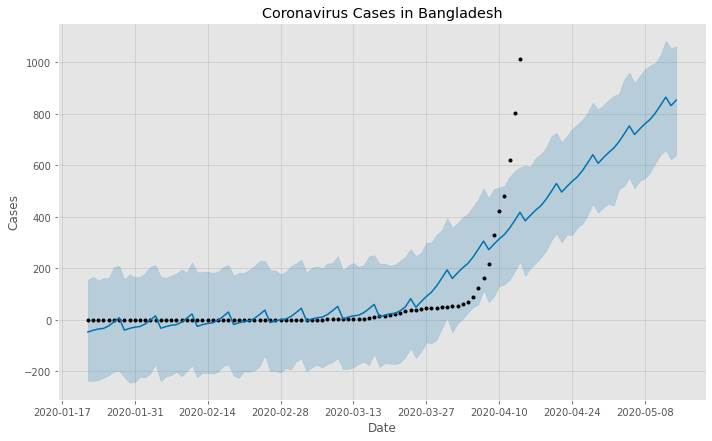

In [33]:
#ploting the predicted Coronavirus cases for next 30 days
plt.figure()
model_cases.plot(predict_cases, xlabel = 'Date', ylabel = 'Cases')
plt.title('Coronavirus Cases in Bangladesh')

In [34]:
#creating model for deaths
deaths = bd_overall_deaths.rename(columns = {'Date' : 'ds', 'Deaths' : 'y'})
model_deaths = Prophet(interval_width = 0.95)
model_deaths.fit(deaths)
predict_deaths = model_deaths.make_future_dataframe(periods = 30)
predict_deaths = model_deaths.predict(predict_deaths)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Deaths from Coronavirus in Bangladesh')

<Figure size 432x288 with 0 Axes>

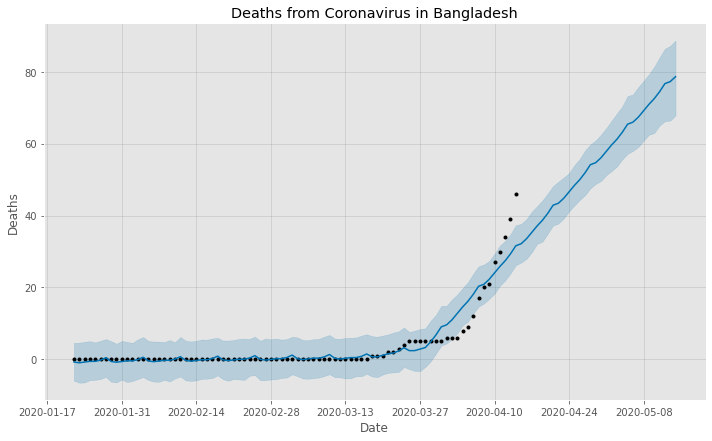

In [35]:
#ploting the predicted deaths from Coronavirus for next 30 days
plt.figure()
model_deaths.plot(predict_deaths, xlabel = 'Date', ylabel = 'Deaths')
plt.title('Deaths from Coronavirus in Bangladesh')

In [36]:
#creating model for recovered
recovered = bd_overall_recovered.rename(columns = {'Date' : 'ds', 'Recovered' : 'y'})
model_recovered = Prophet(interval_width = 0.95)
model_recovered.fit(recovered)
predict_recovered = model_recovered.make_future_dataframe(periods = 30)
predict_recovered = model_recovered.predict(predict_recovered)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Recovered from Coronavirus in Bangladesh')

<Figure size 432x288 with 0 Axes>

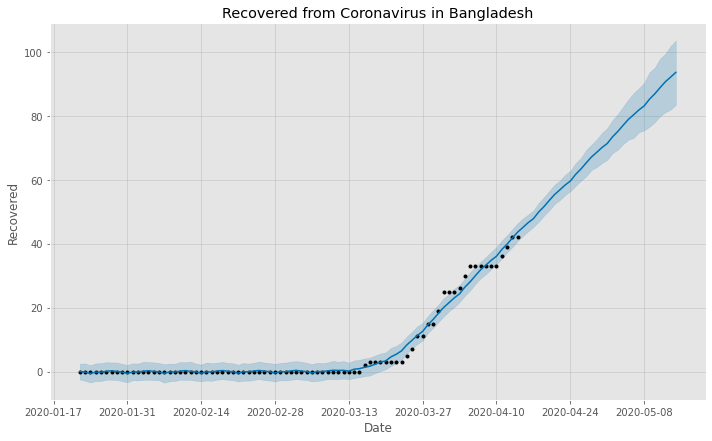

In [37]:
#ploting the predicted recoveries from Coronavirus for next 30 days
plt.figure()
model_recovered.plot(predict_recovered, xlabel = 'Date', ylabel = 'Recovered')
plt.title('Recovered from Coronavirus in Bangladesh')

In [38]:
#combining all the predicted results
cases_columns = ['cases_%s' % column for column in predict_cases.columns]
deaths_columns = ['deaths_%s' % column for column in predict_deaths.columns]
recovered_columns = ['recovered_%s' % column for column in predict_recovered.columns]

merge_predict_cases = predict_cases.copy()
merge_predict_deaths = predict_deaths.copy()
merge_predict_recovered = predict_recovered.copy()

merge_predict_cases.columns = cases_columns
merge_predict_deaths.columns = deaths_columns
merge_predict_recovered.columns = recovered_columns

prediction_temp = pd.merge(merge_predict_cases, merge_predict_deaths, how = 'inner', left_on = 'cases_ds', right_on = 'deaths_ds')
prediction = pd.merge(prediction_temp, merge_predict_recovered, how = 'inner', left_on = 'deaths_ds', right_on = 'recovered_ds')

prediction = prediction.rename(columns = {'cases_ds': 'Date'}).drop('deaths_ds', axis = 1)
prediction.drop('recovered_ds', axis = 1)
prediction.head()

,Date,cases_trend,cases_yhat_lower,cases_yhat_upper,cases_trend_lower,cases_trend_upper,cases_additive_terms,cases_additive_terms_lower,cases_additive_terms_upper,cases_weekly,...,recovered_additive_terms,recovered_additive_terms_lower,recovered_additive_terms_upper,recovered_weekly,recovered_weekly_lower,recovered_weekly_upper,recovered_multiplicative_terms,recovered_multiplicative_terms_lower,recovered_multiplicative_terms_upper,recovered_yhat
0,2020-01-22,-28.303143,-235.532561,156.090697,-28.303143,-28.303143,-18.283706,-18.283706,-18.283706,-18.283706,...,0.124303,0.124303,0.124303,0.124303,0.124303,0.124303,0.0,0.0,0.0,0.007847
1,2020-01-23,-27.260705,-236.485524,167.774665,-27.260705,-27.260705,-12.898982,-12.898982,-12.898982,-12.898982,...,-0.048637,-0.048637,-0.048637,-0.048637,-0.048637,-0.048637,0.0,0.0,0.0,-0.161218
2,2020-01-24,-26.218267,-233.415216,154.003954,-26.218267,-26.218267,-8.847747,-8.847747,-8.847747,-8.847747,...,-0.471608,-0.471608,-0.471608,-0.471608,-0.471608,-0.471608,0.0,0.0,0.0,-0.580314
3,2020-01-25,-25.175829,-223.766981,162.816117,-25.175829,-25.175829,-7.630973,-7.630973,-7.630973,-7.630973,...,-0.061259,-0.061259,-0.061259,-0.061259,-0.061259,-0.061259,0.0,0.0,0.0,-0.166090
4,2020-01-26,-24.133392,-215.019609,162.339222,-24.133392,-24.133392,1.251523,1.251523,1.251523,1.251523,...,-0.067604,-0.067604,-0.067604,-0.067604,-0.067604,-0.067604,0.0,0.0,0.0,-0.168559


In [39]:
#plotting the trends of cases, deaths, and recoveries
fig4 = go.Figure()

fig4.add_trace(go.Scatter(x = prediction['Date'], y = prediction['cases_trend'], mode = 'lines', name = 'Cases', line = dict(color = 'yellow', width = 1)))
fig4.add_trace(go.Scatter(x = prediction['Date'], y = prediction['deaths_trend'], mode = 'lines', name = 'Deaths', line = dict(color = 'red', width = 1)))
fig4.add_trace(go.Scatter(x = prediction['Date'], y = prediction['recovered_trend'], mode = 'lines', name = 'Recovered', line = dict(color = 'green', width = 1)))

fig4.update_layout(title = "Trend between Cases, Deaths, and Recoveries in Bangladesh", xaxis_title = "Date", yaxis_title = "Values",  height = 600, width = 950)
   
fig4.show()

In [40]:
#ploting estimated values of Cases, Deaths, and Recovered
fig5 = go.Figure()

fig5.add_trace(go.Scatter(x = prediction['Date'], y = prediction['cases_yhat'], mode = 'lines', name = 'Cases', line = dict(color = 'yellow', width = 1)))
fig5.add_trace(go.Scatter(x = prediction['Date'], y = prediction['deaths_yhat'], mode = 'lines', name = 'Deaths', line = dict(color = 'red', width = 1)))
fig5.add_trace(go.Scatter(x = prediction['Date'], y = prediction['recovered_yhat'], mode = 'lines', name = 'Recovered', line = dict(color = 'green', width = 1)))

fig5.update_layout(title = "Estimation between Cases, Deaths, and Recovered", xaxis_title = "Date", yaxis_title = "Values",  height = 600, width = 950)
   
fig5.show()

In [41]:
#ploting weekly analysis of cases, deaths, and recoveries from Coronavirus in Bangladesh

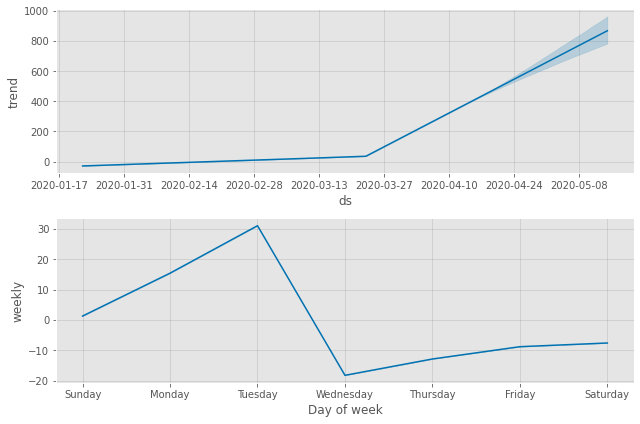

In [42]:
model_cases.plot_components(predict_cases);

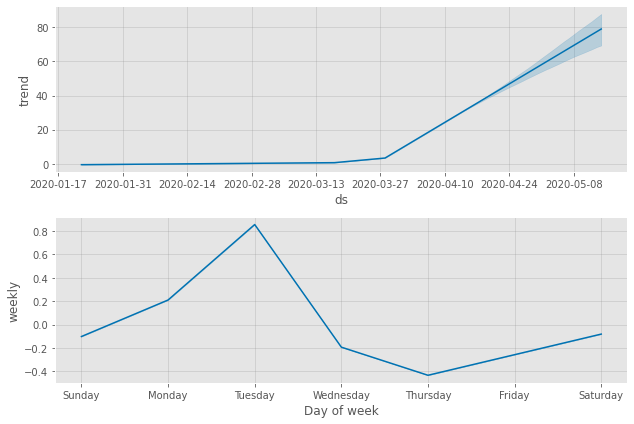

In [43]:
model_deaths.plot_components(predict_deaths);

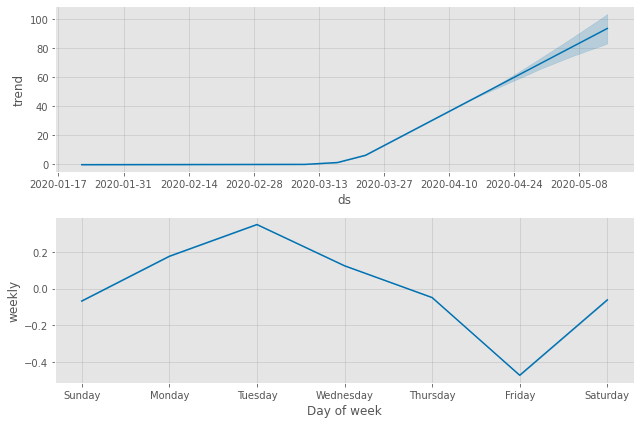

In [44]:
model_recovered.plot_components(predict_recovered);